In [28]:
import numpy as np
import pandas as pd
import geopandas
import xarray as xr
import fsspec

In [29]:
from datashader.utils import lnglat_to_meters
from datashader.colors import viridis
import datashader
from holoviews.operation.datashader import datashade, shade, dynspread, spread, rasterize

In [30]:
import holoviews as hv, geoviews as gv
from geoviews import opts
from geoviews import tile_sources as gvts

In [31]:
from holoviews.streams import Selection1D, Params
import panel as pn

In [32]:
import hvplot.pandas 
import hvplot.xarray

In [33]:
from scipy.spatial import distance

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
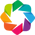

In [34]:
gv.extension('bokeh')

# Load data

### Sites info 

In [35]:
# load site location
sites = pd.read_csv('data/csv/snotel_colorado.csv')
sites.tail()

ntwk state                site_name    lat     lon   elev
110  SNTL    CO        Wild Basin (1042)  40.20 -105.60   9560
111  SNTL    CO  Willow Creek Pass (869)  40.35 -106.09   9540
112  SNTL    CO        Willow Park (870)  40.43 -105.73  10700
113  SNTL    CO  Wolf Creek Summit (874)  37.48 -106.80  11000
114  SNTL    CO            Zirkel (1033)  40.79 -106.60   9340

In [36]:
# project site loc to Web Mercator
x, y = lnglat_to_meters(sites.lon, sites.lat)
sites_projected = sites.join([pd.DataFrame({'easting': x}), pd.DataFrame({'northing': y})])

In [37]:
sites_projected

ntwk state                site_name    lat     lon   elev       easting  \
0    SNTL    CO           Apishapa (303)  37.33 -105.07  10000 -1.169634e+07   
1    SNTL    CO     Arapaho Ridge (1030)  40.35 -106.35  10960 -1.183883e+07   
2    SNTL    CO          Bear Lake (322)  40.31 -105.65   9500 -1.176090e+07   
3    SNTL    CO        Bear River (1061)  40.06 -107.01   9080 -1.191230e+07   
4    SNTL    CO           Beartown (327)  37.71 -107.51  11600 -1.196796e+07   
..    ...   ...                      ...    ...     ...    ...           ...   
110  SNTL    CO        Wild Basin (1042)  40.20 -105.60   9560 -1.175534e+07   
111  SNTL    CO  Willow Creek Pass (869)  40.35 -106.09   9540 -1.180988e+07   
112  SNTL    CO        Willow Park (870)  40.43 -105.73  10700 -1.176981e+07   
113  SNTL    CO  Wolf Creek Summit (874)  37.48 -106.80  11000 -1.188892e+07   
114  SNTL    CO            Zirkel (1033)  40.79 -106.60   9340 -1.186666e+07   

         northing  
0    4.485205e+06  
1    4.916934e+06  
2    4.911093e+06  
3    4.874665e+06  
4    4.538539e+06  
..            ...  
110  4.895048e+06  
111  4.916934e+06  
112  4.928627e+06  
113  4.506225e+06  
114  4.981416e+06  

[115 rows x 8 columns]

In [38]:
# dataframe to hvplot obj Points
pts_opts=dict(size=8, nonselection_alpha=0.4, tools=['tap', 'hover'])
site_points=sites_projected.hvplot.points(x='easting', y='northing', c='elev', hover_cols=['site_name', 'ntwk', 'state', 'lon', 'lat']).opts(**pts_opts)

### LIS model outputs

In [39]:
url_test = 's3://eis-dh-hydro/LIS/OL_1km/SURFACEMODEL'
ds_ol = xr.open_zarr(fsspec.get_mapper(url_test), consolidated=True)

In [40]:
#get variable names:string
vnames = list(ds_ol.data_vars)
print(vnames)
#get time-stamps:string
tstamps = list(np.datetime_as_string(ds_ol.time.values, 'D'))
print(len(tstamps), tstamps[0], tstamps[-1])

['Albedo_tavg', 'CanopInt_tavg', 'ECanop_tavg', 'ESoil_tavg', 'GPP_tavg', 'LAI_tavg', 'NEE_tavg', 'Qg_tavg', 'Qh_tavg', 'Qle_tavg', 'Qs_tavg', 'Qsb_tavg', 'RadT_tavg', 'SWE_tavg', 'SnowDepth_tavg', 'Snowcover_tavg', 'SoilMoist_tavg', 'TVeg_tavg', 'TWS_tavg', 'TotalPrecip_tavg', 'lat', 'lon']
2922 2013-01-02 2021-01-01


In [41]:
#pix loc : df
df_loc = ds_ol[['lon','lat']].isel(time=0).to_dataframe().reset_index()
df_loc[-10:-1]

east_west  north_south  lon  lat       time
7543369       3610         2079  NaN  NaN 2013-01-02
7543370       3610         2080  NaN  NaN 2013-01-02
7543371       3610         2081  NaN  NaN 2013-01-02
7543372       3610         2082  NaN  NaN 2013-01-02
7543373       3610         2083  NaN  NaN 2013-01-02
7543374       3610         2084  NaN  NaN 2013-01-02
7543375       3610         2085  NaN  NaN 2013-01-02
7543376       3610         2086  NaN  NaN 2013-01-02
7543377       3610         2087  NaN  NaN 2013-01-02

# Site Map and Timeseries

In [42]:
def nearest_grid(pt):
    # pt : input point, tuple (longtitude, latitude)
    # output:
    #        x_idx, y_idx 
    loc_valid = df_loc.dropna()
    pts = loc_valid[['lon', 'lat']].to_numpy()
    idx = distance.cdist([pt], pts).argmin()

    return loc_valid['east_west'].iloc[idx], loc_valid['north_south'].iloc[idx]

def var_subset(v, ix, iy, ts, te):
    return ds_ol[v].isel(north_south=iy, east_west=ix).sel(time=slice(ts, te)).load()

def line_callback(index, vname, ts_tag, te_tag):
    time_tag = '2013-02'
    if not index:
        title='Var: -- Lon: -- Lat: --'
        return ds_ol[vname].isel(north_south=1682, east_west=2).sel(time=time_tag).hvplot(title=title)
        
    
    first_index = index[0]
    row = sites.iloc[first_index]

    ix, iy = nearest_grid((row.lon, row.lat))
    #vals = ds_ol[vname].isel(north_south=iy, east_west=ix).sel(time=time_tag).load()
    vals=var_subset(vname, ix, iy, ts_tag, te_tag)
    
    vs = vname.split('_')[0]
    title=f'Var: {vs} Lon: {row.lon} Lat: {row.lat}'
    
    return vals.hvplot(title=title)

In [43]:
from datetime import datetime as dt
date_fmt='%Y-%m-%d'
dt.strptime(tstamps[0], date_fmt)

datetime.datetime(2013, 1, 2, 0, 0)

In [54]:
# base map
tiles = gvts.EsriImagery()
site_dmap = hv.util.Dynamic(site_points).opts(height=400, width=600)

# variable widget
var_select = pn.widgets.Select(options=vnames[:-2], name="LIS Variable List")
var_stream = Params(var_select, ['value'], rename={'value':'vname'})

# date range
sdate_input = pn.widgets.DatetimeInput(name='Start date', value=dt(2013,2,1),start=dt.strptime(tstamps[0], date_fmt), end=dt.strptime(tstamps[-1], date_fmt), format=date_fmt)
sdate_stream = Params(sdate_input, ['value'], rename={'value':'ts_tag'})
edate_input = pn.widgets.DatetimeInput(name='End date', value=dt(2013,2,28),start=dt.strptime(tstamps[0], date_fmt), end=dt.strptime(tstamps[-1], date_fmt),format=date_fmt)
edate_stream = Params(edate_input, ['value'], rename={'value':'te_tag'})

# site location 
select_stream = Selection1D(source=site_dmap)


line = hv.DynamicMap(line_callback, streams=[select_stream, var_stream, sdate_stream, edate_stream])
pn.Row(site_dmap*tiles, pn.Column(var_select, pn.Row(sdate_input, edate_input), line))

Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] Select(name='LIS Variable List', options=['Albedo_tavg', ...], value='Albedo_tavg')
        [1] Row
            [0] DatetimeInput(end=datetime.datetime(2021, ..., format='%Y-%m-%d', name='Start date', start=datetime.datetime(2013, ..., type=<class 'datetime.datetime'..., value=datetime.datetime(2013, ...)
            [1] DatetimeInput(end=datetime.datetime(2021, ..., format='%Y-%m-%d', name='End date', start=datetime.datetime(2013, ..., type=<class 'datetime.datetime'..., value=datetime.datetime(2013, ...)
        [2] HoloViews(DynamicMap)

# LIS Map

In [45]:
var_select = pn.widgets.Select(options=vnames[:-2], name="LIS Variable List")
var_stream = Params(var_select, ['value'], rename={'value':'vname'})
date_select= pn.widgets.DiscreteSlider(options=tstamps, name="LIS Model Date")
date_stream = Params(date_select, ['value'], rename={'value':'date'})

In [46]:
def var_layer(vname=None, date=None):
    dssm = ds_ol[['lat', 'lon', vname]].sel(time=date).compute()
    dfsm = dssm.to_dataframe().reset_index()
    x,y = lnglat_to_meters(dfsm.lon, dfsm.lat)
    df_projected = dfsm.join([pd.DataFrame({'easting':x}), (pd.DataFrame({'northing':y}))])
    points = hv.Points(gv.Dataset(df_projected, kdims=['easting', 'northing'], vdims=[vname]))
    return points
    

In [56]:
dmap = hv.DynamicMap(var_layer, streams=[var_stream, date_stream])
pn.Column(var_select, date_select, 
          gvts.EsriImagery()*rasterize(dmap, aggregator=datashader.mean()).opts(cmap=viridis, colorbar=True,width=800, height=600))

#opts(clim=(0,0.9))

Column
    [0] Select(name='LIS Variable List', options=['Albedo_tavg', ...], value='Albedo_tavg')
    [1] DiscreteSlider(name='LIS Model Date', options=['2013-01-02', ...], value='2013-01-02')
    [2] HoloViews(DynamicMap)

## LIS Map -- Updated to add `lat`/`lon` dimensions

This approach allows us to work directly with the LIS output `xarray.Dataset` by adding lat/lon coords rather than converting it to a `pandas.DataFrame` object. The `add_latlon_coords()` function below scrapes the spatial resolution and lower-left corner lat/lon from the dataset attributes to replace the `east_west` and `north_south` dimensions with `lat` and `lon`. The original variables `lat` and `lon` are renamed to `orig_lat` and `orig_lon` respectively.

In [57]:
def add_latlon_coords(dataset: xr.Dataset)->xr.Dataset:
    """Adds lat/lon as dimensions and coordinates to an xarray.Dataset object."""
    
    # get attributes from dataset
    attrs = dataset.attrs
    
    # get x, y resolutions
    dx = round(float(attrs['DX']), 3)
    dy = round(float(attrs['DY']), 3)
    
    # get grid cells in x, y dimensions
    ew_len = len(dataset['east_west'])
    ns_len = len(dataset['north_south'])
    
    # get lower-left lat and lon
    ll_lat = round(float(attrs['SOUTH_WEST_CORNER_LAT']), 3)
    ll_lon = round(float(attrs['SOUTH_WEST_CORNER_LON']), 3)
    
    # calculate upper-right lat and lon
    ur_lat =  ll_lat + (dy * ns_len)
    ur_lon = ll_lon + (dx * ew_len)
    
    # define the new coordinates
    coords = {
        # create an arrays containing the lat/lon at each gridcell
        'lat': np.linspace(ll_lat, ur_lat, ns_len, dtype=np.float32, endpoint=False),
        'lon': np.linspace(ll_lon, ur_lon, ew_len, dtype=np.float32, endpoint=False)
    }
    
   
    # drop the original lat and lon variables
    dataset = dataset.rename({'lon': 'orig_lon', 'lat': 'orig_lat'})
    # rename the grid dimensions to lat and lon
    dataset = dataset.rename({'north_south': 'lat', 'east_west': 'lon'})
    # assign the coords above as coordinates
    dataset = dataset.assign_coords(coords)
    # reassign variable attributes
    dataset.lon.attrs = dataset.orig_lon.attrs
    dataset.lat.attrs = dataset.orig_lat.attrs
    
    return dataset

Add the lat/lon coords to the dataset:

In [58]:
ol_sf_ds = add_latlon_coords(ds_ol)

Inspect the dataset and note the new lat/lon dimensions and coordinates:

In [59]:
ol_sf_ds

<xarray.Dataset>
Dimensions:           (SoilMoist_profiles: 4, lat: 2089, lon: 3611, time: 2922)
Coordinates:
  * time              (time) datetime64[ns] 2013-01-02 2013-01-03 ... 2021-01-01
  * lat               (lat) float32 28.85 28.86 28.88 ... 49.72 49.72 49.74
  * lon               (lon) float32 -113.9 -113.9 -113.9 ... -77.85 -77.83
Dimensions without coordinates: SoilMoist_profiles
Data variables: (12/22)
    Albedo_tavg       (time, lat, lon) float32 dask.array<chunksize=(1, 2089, 3611), meta=np.ndarray>
    CanopInt_tavg     (time, lat, lon) float32 dask.array<chunksize=(1, 2089, 3611), meta=np.ndarray>
    ECanop_tavg       (time, lat, lon) float32 dask.array<chunksize=(1, 2089, 3611), meta=np.ndarray>
    ESoil_tavg        (time, lat, lon) float32 dask.array<chunksize=(1, 2089, 3611), meta=np.ndarray>
    GPP_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 2089, 3611), meta=np.ndarray>
    LAI_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 2089, 3611), meta=np.ndarray>
    ...                ...
    SoilMoist_tavg    (time, SoilMoist_profiles, lat, lon) float32 dask.array<chunksize=(1, 4, 2089, 3611), meta=np.ndarray>
    TVeg_tavg         (time, lat, lon) float32 dask.array<chunksize=(1, 2089, 3611), meta=np.ndarray>
    TWS_tavg          (time, lat, lon) float32 dask.array<chunksize=(1, 2089, 3611), meta=np.ndarray>
    TotalPrecip_tavg  (time, lat, lon) float32 dask.array<chunksize=(1, 2089, 3611), meta=np.ndarray>
    orig_lat          (time, lat, lon) float32 dask.array<chunksize=(1, 2089, 3611), meta=np.ndarray>
    orig_lon          (time, lat, lon) float32 dask.array<chunksize=(1, 2089, 3611), meta=np.ndarray>
Attributes: (12/15)
    DX:                      0.009999999776482582
    DY:                      0.009999999776482582
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNESSES:  [10.0, 30.000001907348633, 60.000003814697266, 1...
    SOUTH_WEST_CORNER_LAT:   28.854999542236328
    ...                      ...
    history:                 created on date: 2021-03-25T11:48:18.944
    institution:             NASA GSFC
    missing_value:           -9999.0
    references:              Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007
    source:                  
    title:                   LIS land surface model output

Define the function `load_variable()` that we will pass to a `holoviews.DynamicMap` object and build the `DynamicMap`:

In [51]:
var_select = pn.widgets.Select(options=vnames[:-2], name="LIS Variable List")
var_stream = Params(var_select, ['value'], rename={'value':'vname'})
date_select= pn.widgets.DiscreteSlider(options=tstamps, name="LIS Model Date")
date_stream = Params(date_select, ['value'], rename={'value':'date'})

The simplified callback no longer converts the `xarray.Dataset` to `pandas.DataFrame`:

In [52]:
def var_layer(vname=None, date=None):
    dssm = ol_sf_ds[vname].sel(time=date)
    image = gv.Image(gv.Dataset(dssm, kdims=['lon', 'lat'], vdims=[vname]))
    return image
    

In [53]:
dmap = hv.DynamicMap(var_layer, streams=[var_stream, date_stream])
pn.Column(var_select, date_select, 
          gvts.EsriImagery()*rasterize(dmap, aggregator=datashader.mean()).opts(cmap=viridis, colorbar=True,width=800, height=600))

Column
    [0] Select(name='LIS Variable List', options=['Albedo_tavg', ...], value='Albedo_tavg')
    [1] DiscreteSlider(name='LIS Model Date', options=['2013-01-02', ...], value='2013-01-02')
    [2] HoloViews(DynamicMap)